In [1]:
import gymnasium as gym
import tensorflow as tf
from tensorflow import keras

2023-04-12 21:26:49.789932: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow.keras.initializers import Initializer
keras.Sequential()

2023-04-12 21:26:54.050441: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#env = gym.make('CartPole-v1')
env = gym.make(
            id="CartPole-v1",  # Choose one of the existing environments
            render_mode="rgb_array",  # The set of supported modes varies per environment. (And some third-party environments may not support rendering at all.)
        )

Action Space is a [Discrete](https://gymnasium.farama.org/api/spaces/fundamental/#gymnasium.spaces.Discrete) type
A space consisting of finitely many elements.
In CartPole-v1, it has two actions: left or right

In [4]:
print(type(env.action_space))
print(f"Action space size: {env.action_space.n}")
print(f"Action space start value: {env.action_space.start}")
env.action_space

<class 'gymnasium.spaces.discrete.Discrete'>
Action space size: 2
Action space start value: 0


Discrete(2)

Observation space is a 4 dimension state: 
- Cart Position
- Cart Velocity
- Pole Angle
- Pole Velocity at tip

In [5]:
print(type(env.observation_space))
# print(f"Action space size: {env.observation_space.n}")
# print(f"Action space start value: {env.observation_space.start}")
env.observation_space

<class 'gymnasium.spaces.box.Box'>


Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [6]:
env.observation_space.shape

(4,)

In [7]:
observation,_ = env.reset()

In [8]:
next_state, reward, terminated, truncated, info = env.step(1)

### Create CartPole environment

In [9]:
from q_learning_lab.domain.models.cart_pole_v1_models import Params as Cart_Pole_Params
from pathlib import Path
params = Cart_Pole_Params(
            total_episodes=2000,
            n_max_steps=100,
            learning_rate=0.7, # learning rate alpha
            gamma=0.618, # discount rate
            epsilon=0.1,
            savefig_folder=Path("_static/img/tutorials/"),
            savemodel_folder=Path("_static/model/tutorials/"),
            start_epsilon=1.0,  # Starting exploration probability
            min_epsilon=0.05,  # Minimum exploration probability
            decay_rate=0.001,
        )

KeyboardInterrupt: 

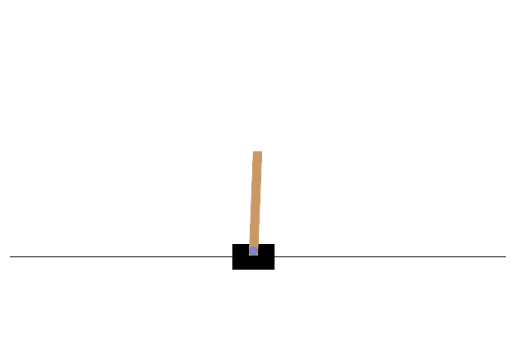

In [10]:
from q_learning_lab.port.environment import create_execute_environment
from q_learning_lab.domain.models.cart_pole_v1_models import get_dnn_structure
from q_learning_lab.domain.deep_q_learn import Reinforcement_DeepLearning
import os
# Create the environment
env = create_execute_environment(arena="CartPole-v1", params=params)
dnn_structure = get_dnn_structure(
            input_dim=env.observation_space_dim,
            output_dim=env.action_space_dim,
        )
deepagent_dict = Reinforcement_DeepLearning.train(
            env=env,
            params=params,
            dnn_structure=dnn_structure,
            is_verbose=True,
            model_name="CartPole-v1-interactive",
        )
